In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [21]:
df = pd.read_csv("../data/dataimmo_noNa.csv")


In [78]:
'''{
  "data": {
    "area": int,
    "property-type": "APARTMENT" | "HOUSE" | "OTHERS",
    "rooms-number": int,
    "zip-code": int,
    "land-area": Optional[int],
    "garden": Optional[bool],
    "garden-area": Optional[int],
    "equipped-kitchen": Optional[bool],
    "full-address": Optional[str],
    "swimming-pool": Optional[bool],
    "furnished": Optional[bool],
    "open-fire": Optional[bool],
    "terrace": Optional[bool],
    "terrace-area": Optional[int],
    "facades-number": Optional[int],
    "building-state": Optional[
      "NEW" | "GOOD" | "TO RENOVATE" | "JUST RENOVATED" | "TO REBUILD"
    ]
  }
}
'''

In [ ]:
# df = df.assign(age_of_property=lambda x: (2022 - x['construction_year'])) #if x = 0 or NA delete!
# df['age_of_property'] = df["age_of_property"].astype(float)

In [22]:
df.rename(columns = {'price' : 'price', 'area': 'area', 'type_of_property' :'property-type', 'number_of_rooms':"rooms-number", "zip_code": "zip-code", "surface_of_the_land": "land-area", "garden": "garden", "garden_area": "garden-area", "equipped_kitchen" : "equipped-kitchen",  "locality": "full-address", "swimming_pool":"swimming-pool", "furnished":"furnished","open_fire" :"open-fire",  "terrace":"terrace", "terrace_area" : "terrace-area",  "number_of_facades": "facades-number", "state_of_the_building":"building-state" }, inplace = True)

In [24]:
df = df[['price', 'area', 'property-type', "rooms-number", "zip-code",  "land-area",  "garden", "garden-area", "equipped-kitchen",   "full-address", "swimming-pool", "furnished", "open-fire",  "terrace",  "terrace-area",  "facades-number", "building-state"  ]]

In [25]:
#pd.set_option('display.max_columns', None)
df.head(15)

,price,area,property-type,rooms-number,zip-code,land-area,garden,garden-area,equipped-kitchen,full-address,swimming-pool,furnished,open-fire,terrace,terrace-area,facades-number,building-state
0,159000,122,house,2,4430,335,1,171,1.0,ans,0,0,0,1,20,2,good
1,345000,119,house,4,9000,49,0,0,1.0,gent,0,0,0,0,0,2,good
2,570000,404,house,4,1570,1000,1,1000,1.0,galmaarden,0,0,0,1,52,4,as new
3,800000,350,house,4,1190,263,1,140,1.0,forest,0,0,0,0,0,2,to rebuild
4,425000,130,house,3,4950,991,0,0,1.0,waimes,0,0,0,1,14,4,good
5,450000,306,house,6,9600,460,1,215,1.0,ronse,0,0,0,1,12,2,good
6,750000,200,house,4,1150,360,0,0,1.0,woluwe-saint-pierre,0,0,0,0,0,3,to renovate
7,849000,1010,house,6,4607,16959,1,15324,1.0,dalhem,0,0,0,1,80,4,good
8,129000,165,house,3,9600,610,1,430,0.0,ronse,0,0,0,0,0,2,to renovate
9,300000,125,house,2,4350,714,1,540,1.0,remicourt,0,0,0,1,20,4,good


In [80]:
df.isnull().sum() #no null values

garden_area               0
terrace_area              0
locality                  0
type_of_property          0
subtype_of_property       0
type_of_sale              0
zip_code                  0
url                       0
state_of_the_building     0
terrace                   0
open_fire                 0
swimming_pool             0
price                     0
garden                    0
number_of_facades         0
number_of_rooms           0
fully_equipped_kitchen    0
area                      0
furnished                 0
surface_of_the_land       0
area_text                 0
bid                       0
equipped_kitchen          0
code                      0
name                      0
lat                       0
lng                       0
province                  0
dtype: int64

array([[<AxesSubplot:title={'center':'garden_area'}>,
        <AxesSubplot:title={'center':'terrace_area'}>,
        <AxesSubplot:title={'center':'zip_code'}>,
        <AxesSubplot:title={'center':'terrace'}>],
       [<AxesSubplot:title={'center':'open_fire'}>,
        <AxesSubplot:title={'center':'swimming_pool'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'garden'}>],
       [<AxesSubplot:title={'center':'number_of_facades'}>,
        <AxesSubplot:title={'center':'number_of_rooms'}>,
        <AxesSubplot:title={'center':'area'}>,
        <AxesSubplot:title={'center':'furnished'}>],
       [<AxesSubplot:title={'center':'surface_of_the_land'}>,
        <AxesSubplot:title={'center':'bid'}>,
        <AxesSubplot:title={'center':'equipped_kitchen'}>,
        <AxesSubplot:title={'center':'code'}>],
       [<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'lng'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

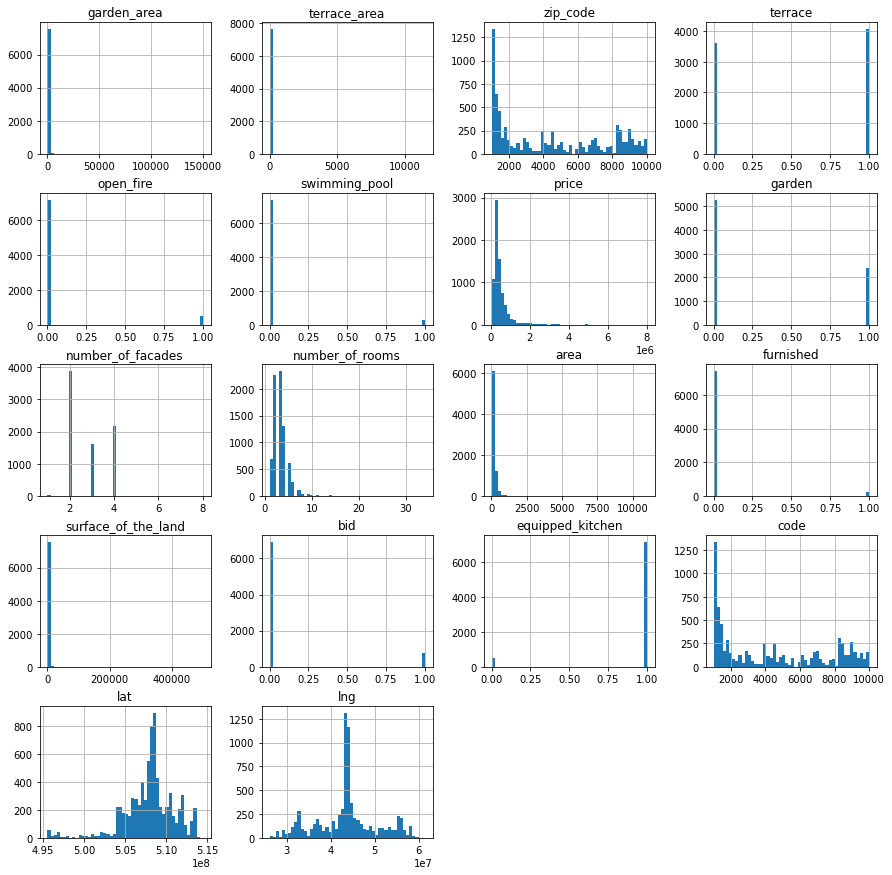

In [95]:
df.hist(bins=50, figsize=(15, 15), )

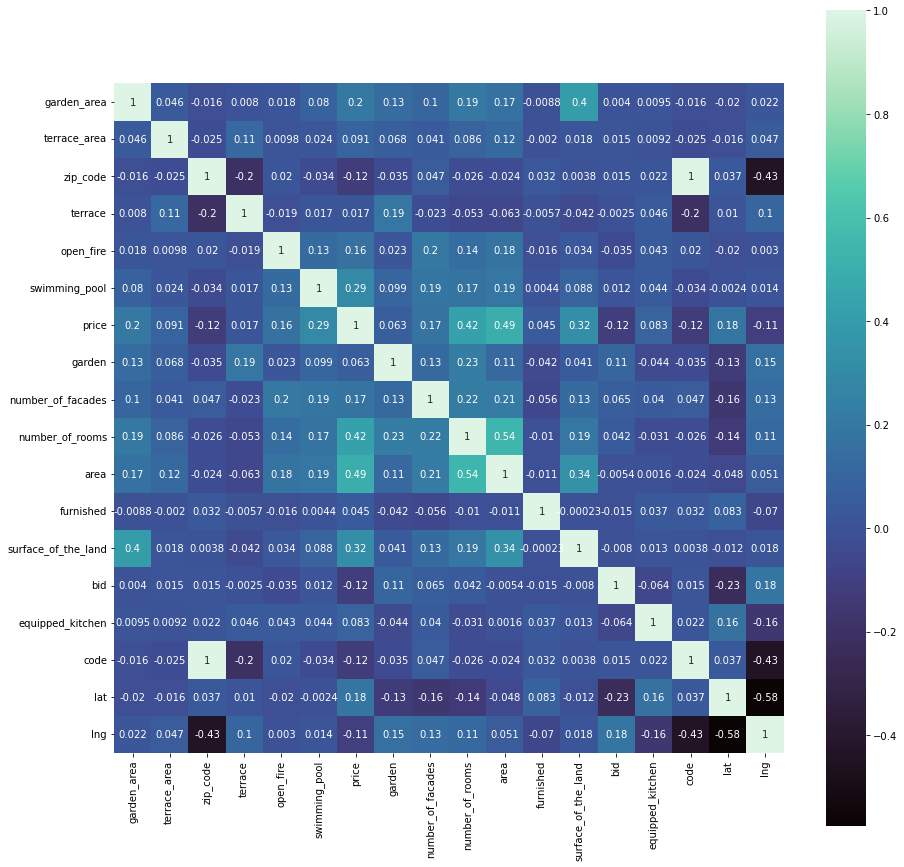

In [94]:
cor_mat= df[:].corr()
fig=plt.gcf()
fig.set_size_inches(15,15)
sns.heatmap(data=cor_mat, square=True, annot=True, cbar=True, cmap="mako")
plt.savefig('corr-matrix.png')
plt.show()

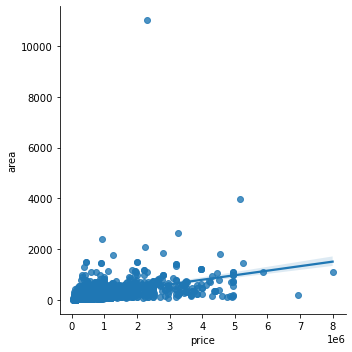

In [111]:
sns.lmplot(x='price',y='area',data=df)

In [99]:
y= np.array(df['price'])
X= df.drop(['price', 'name', 'province', 'code', 'locality', 'type_of_property', 'subtype_of_property', 'type_of_sale','url', 'state_of_the_building', 'fully_equipped_kitchen','area_text'],axis=1)

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 0)
print(X_train.shape)
print(X_test.shape)


(6149, 16)
(1538, 16)


In [ ]:
#Fit the model over the training dataset
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

In [105]:
#Calculate intercept and coefficient
print(model.intercept_)
print(model.coef_)
pred=model.predict(X_test)
predictions = pred.reshape(-1,1)

-12558971.749909537
[ 2.48350529e+00  1.13551504e+02 -2.92948933e+01  3.64153207e+04
  8.58312791e+04  4.91623563e+05 -2.97946526e+04  3.60166851e+04
  7.46945157e+04  6.96089962e+02  1.18197028e+05  1.13750328e+01
 -1.15160847e+05  6.88462503e+04  2.57146380e-02 -9.98561561e-03]


In [109]:
#Calculate root mean squared error to evaluate model performance
from sklearn.metrics import mean_squared_error
print('MSE : ', mean_squared_error(y_test,predictions))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,predictions)))

MSE :  183605209789.44806
RMSE :  428491.7849731171
